In [1]:
import tools as tl
%load_ext autoreload
%autoreload 2
import pandas as pd

In [2]:
nb_months = 12 # number of months considered in the rolling window

In [3]:
SP500=['MMM', 'ABT', 'ABBV', 'ABMD', 'ACN', 'ATVI', 'ADBE', 'AMD', 'AAP', 'AES', 'AFL', 'A', 'APD', 'AKAM', 'ALK', 'ALB', 'ARE', 'ALXN', 'ALGN', 'ALLE', 'LNT', 'ALL', 'GOOGL', 'GOOG', 'MO', 'AMZN', 'AMCR', 'AEE', 'AAL', 'AEP', 'AXP', 'AIG', 'AMT', 'AWK', 'AMP', 'ABC', 'AME', 'AMGN', 'APH', 'ADI', 'ANSS', 'ANTM', 'AON', 'AOS', 'APA', 'AAPL', 'AMAT', 'APTV', 'ADM', 'ANET', 'AJG', 'AIZ', 'T', 'ATO', 'ADSK', 'ADP', 'AZO', 'AVB', 'AVY', 'BKR', 'BLL', 'BAC', 'BK', 'BAX', 'BDX', 'BRK.B', 'BBY', 'BIO', 'BIIB', 'BLK', 'BA', 'BKNG', 'BWA', 'BXP', 'BSX', 'BMY', 'AVGO', 'BR', 'BF.B', 'CHRW', 'COG', 'CDNS', 'CPB', 'COF', 'CAH', 'KMX', 'CCL', 'CARR', 'CTLT', 'CAT', 'CBOE', 'CBRE', 'CDW', 'CE', 'CNC', 'CNP', 'CERN', 'CF', 'SCHW', 'CHTR', 'CVX', 'CMG', 'CB', 'CHD', 'CI', 'CINF', 'CTAS', 'CSCO', 'C', 'CFG', 'CTXS', 'CLX', 'CME', 'CMS', 'KO', 'CTSH', 'CL', 'CMCSA', 'CMA', 'CAG', 'COP', 'ED', 'STZ', 'COO', 'CPRT', 'GLW', 'CTVA', 'COST', 'CCI', 'CSX', 'CMI', 'CVS', 'DHI', 'DHR', 'DRI', 'DVA', 'DE', 'DAL', 'XRAY', 'DVN', 'DXCM', 'FANG', 'DLR', 'DFS', 'DISCA', 'DISCK', 'DISH', 'DG', 'DLTR', 'D', 'DPZ', 'DOV', 'DOW', 'DTE', 'DUK', 'DRE', 'DD', 'DXC', 'EMN', 'ETN', 'EBAY', 'ECL', 'EIX', 'EW', 'EA', 'EMR', 'ENPH', 'ETR', 'EOG', 'EFX', 'EQIX', 'EQR', 'ESS', 'EL', 'ETSY', 'EVRG', 'ES', 'RE', 'EXC', 'EXPE', 'EXPD', 'EXR', 'XOM', 'FFIV', 'FB', 'FAST', 'FRT', 'FDX', 'FIS', 'FITB', 'FE', 'FRC', 'FISV', 'FLT', 'FLIR', 'FLS', 'FMC', 'F', 'FTNT', 'FTV', 'FBHS', 'FOXA', 'FOX', 'BEN', 'FCX', 'GPS', 'GRMN', 'IT', 'GD', 'GE', 'GIS', 'GM', 'GPC', 'GILD', 'GL', 'GPN', 'GS', 'GWW', 'HAL', 'HBI', 'HIG', 'HAS', 'HCA', 'PEAK', 'HSIC', 'HSY', 'HES', 'HPE', 'HLT', 'HFC', 'HOLX', 'HD', 'HON', 'HRL', 'HST', 'HWM', 'HPQ', 'HUM', 'HBAN', 'HII', 'IEX', 'IDXX', 'INFO', 'ITW', 'ILMN', 'INCY', 'IR', 'INTC', 'ICE', 'IBM', 'IP', 'IPG', 'IFF', 'INTU', 'ISRG', 'IVZ', 'IPGP', 'IQV', 'IRM', 'JKHY', 'J', 'JBHT', 'SJM', 'JNJ', 'JCI', 'JPM', 'JNPR', 'KSU', 'K', 'KEY', 'KEYS', 'KMB', 'KIM', 'KMI', 'KLAC', 'KHC', 'KR', 'LB', 'LHX', 'LH', 'LRCX', 'LW', 'LVS', 'LEG', 'LDOS', 'LEN', 'LLY', 'LNC', 'LIN', 'LYV', 'LKQ', 'LMT', 'L', 'LOW', 'LUMN', 'LYB', 'MTB', 'MRO', 'MPC', 'MKTX', 'MAR', 'MMC', 'MLM', 'MAS', 'MA', 'MKC', 'MXIM', 'MCD', 'MCK', 'MDT', 'MRK', 'MET', 'MTD', 'MGM', 'MCHP', 'MU', 'MSFT', 'MAA', 'MHK', 'TAP', 'MDLZ', 'MPWR', 'MNST', 'MCO', 'MS', 'MOS', 'MSI', 'MSCI', 'NDAQ', 'NTAP', 'NFLX', 'NWL', 'NEM', 'NWSA', 'NWS', 'NEE', 'NLSN', 'NKE', 'NI', 'NSC', 'NTRS', 'NOC', 'NLOK', 'NCLH', 'NOV', 'NRG', 'NUE', 'NVDA', 'NVR', 'ORLY', 'OXY', 'ODFL', 'OMC', 'OKE', 'ORCL', 'OTIS', 'PCAR', 'PKG', 'PH', 'PAYX', 'PAYC', 'PYPL', 'PNR', 'PBCT', 'PEP', 'PKI', 'PRGO', 'PFE', 'PM', 'PSX', 'PNW', 'PXD', 'PNC', 'POOL', 'PPG', 'PPL', 'PFG', 'PG', 'PGR', 'PLD', 'PRU', 'PEG', 'PSA', 'PHM', 'PVH', 'QRVO', 'PWR', 'QCOM', 'DGX', 'RL', 'RJF', 'RTX', 'O', 'REG', 'REGN', 'RF', 'RSG', 'RMD', 'RHI', 'ROK', 'ROL', 'ROP', 'ROST', 'RCL', 'SPGI', 'CRM', 'SBAC', 'SLB', 'STX', 'SEE', 'SRE', 'NOW', 'SHW', 'SPG', 'SWKS', 'SLG', 'SNA', 'SO', 'LUV', 'SWK', 'SBUX', 'STT', 'STE', 'SYK', 'SIVB', 'SYF', 'SNPS', 'SYY', 'TMUS', 'TROW', 'TTWO', 'TPR', 'TGT', 'TEL', 'TDY', 'TFX', 'TER', 'TSLA', 'TXN', 'TXT', 'TMO', 'TJX', 'TSCO', 'TT', 'TDG', 'TRV', 'TRMB', 'TFC', 'TWTR', 'TYL', 'TSN', 'UDR', 'ULTA', 'USB', 'UAA', 'UA', 'UNP', 'UAL', 'UNH', 'UPS', 'URI', 'UHS', 'UNM', 'VLO', 'VAR', 'VTR', 'VRSN', 'VRSK', 'VZ', 'VRTX', 'VFC', 'VIAC', 'VTRS', 'V', 'VNT', 'VNO', 'VMC', 'WRB', 'WAB', 'WMT', 'WBA', 'DIS', 'WM', 'WAT', 'WEC', 'WFC', 'WELL', 'WST', 'WDC', 'WU', 'WRK', 'WY', 'WHR', 'WMB', 'WLTW', 'WYNN', 'XEL', 'XRX', 'XLNX', 'XYL', 'YUM', 'ZBRA', 'ZBH', 'ZION', 'ZTS']

In [4]:
# tickers = ["GOOGL","WMT","BAC","NKE"]
# tickers =  ['MMM', 'HCA', 'AEP', 'HAL', 'TRV', 'CSCO', 'ICE', 'ARE', 'WM', 'ZBH', 'JNPR']
tickers = ['PKI','KR','VNO','NEM','BIIB','HFC','NFLX','COG','NLOK','FLIR','SEE','CLX','ABMD','AAL','DPZ','CPB','TSLA','GILD','LB','CTXS','MRO']
start="2012-01-01"
end="2015-12-31"
# tickers = tl.suggested_assets(20,SP500)

In [6]:
data = tl.get_data(tickers, start, end)

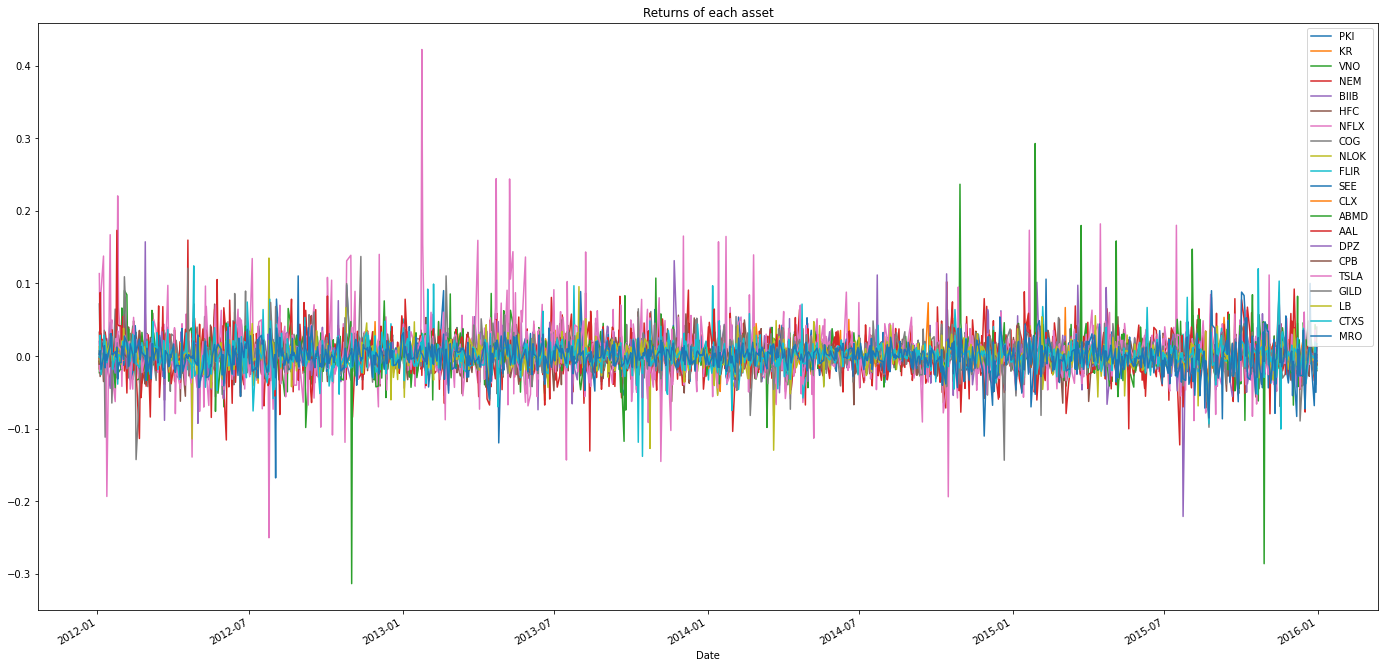

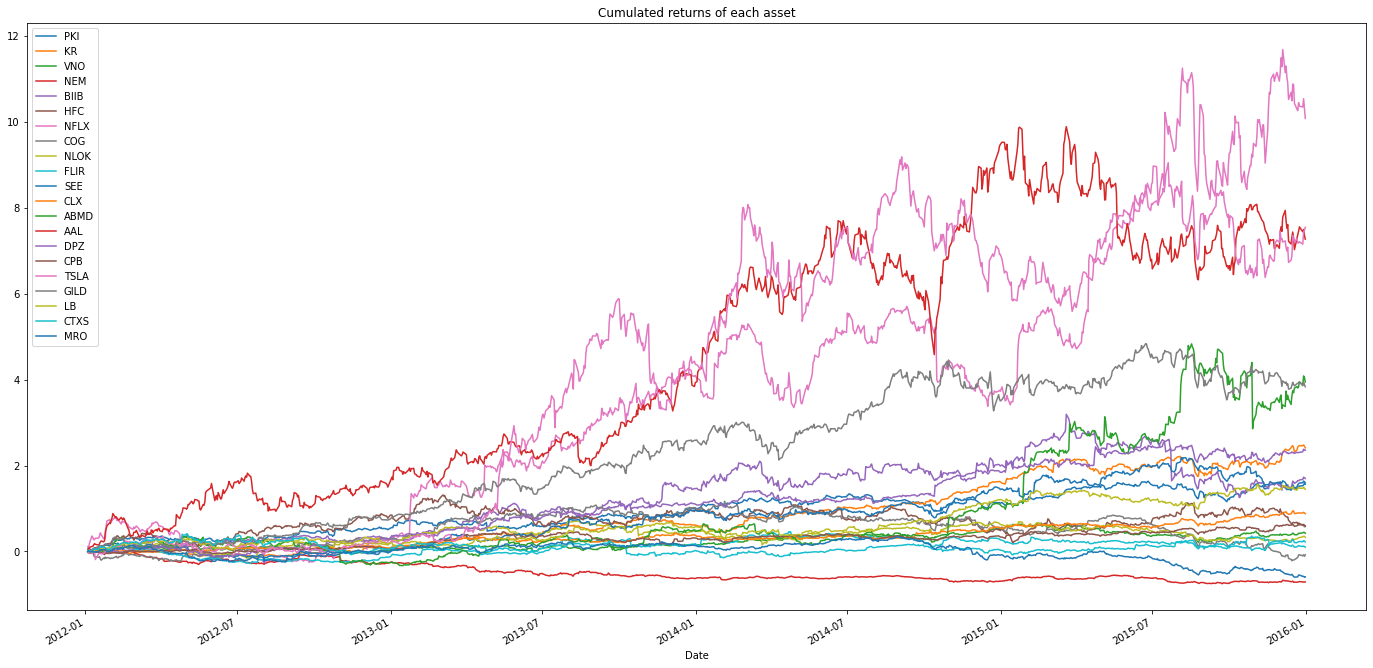

In [7]:
returns = data["Returns"]
returns.plot(figsize=(24,12), title = "Returns of each asset")
cumret = tl.cumulated_returns(returns)
cumret.plot(figsize=(24,12), title = "Cumulated returns of each asset")

In [7]:
#relevant parameters:

# maxturnover = [turnover,2]  , max turnover for 2-norm is 1 (hard to ensure under 1-norm)
# transition_cost=[0.01,2], which means that 0.01*norm(dw) is minimized (a transition cost of 1% on amounts changed)
# RSI1 = -10 , which means that assests are constrained to be long or short depending on extreme values of the RSI momentum of the last 10 days
# RSI2 = [-10, 1], which means that assests are are optimized depending on extreme values of the RSI momentum of the last 10 days, with a ponderation of 1 in the objective function
# risk_parameter = 1 to 10(default), which is the weight of the diversification risk compared to the max return in the objective function
#display = True, which means we plot values of constraints (turnovers, transition costs...)
# Le beta_eq n'a pas l'air d'aider le div ratio...

In [82]:
weights, diversification_ratio_historic = tl.weights_rolling_window(returns, nb_months=12,beta_eq=True, display = True, risk_parameter = 10, RSI1= -10)

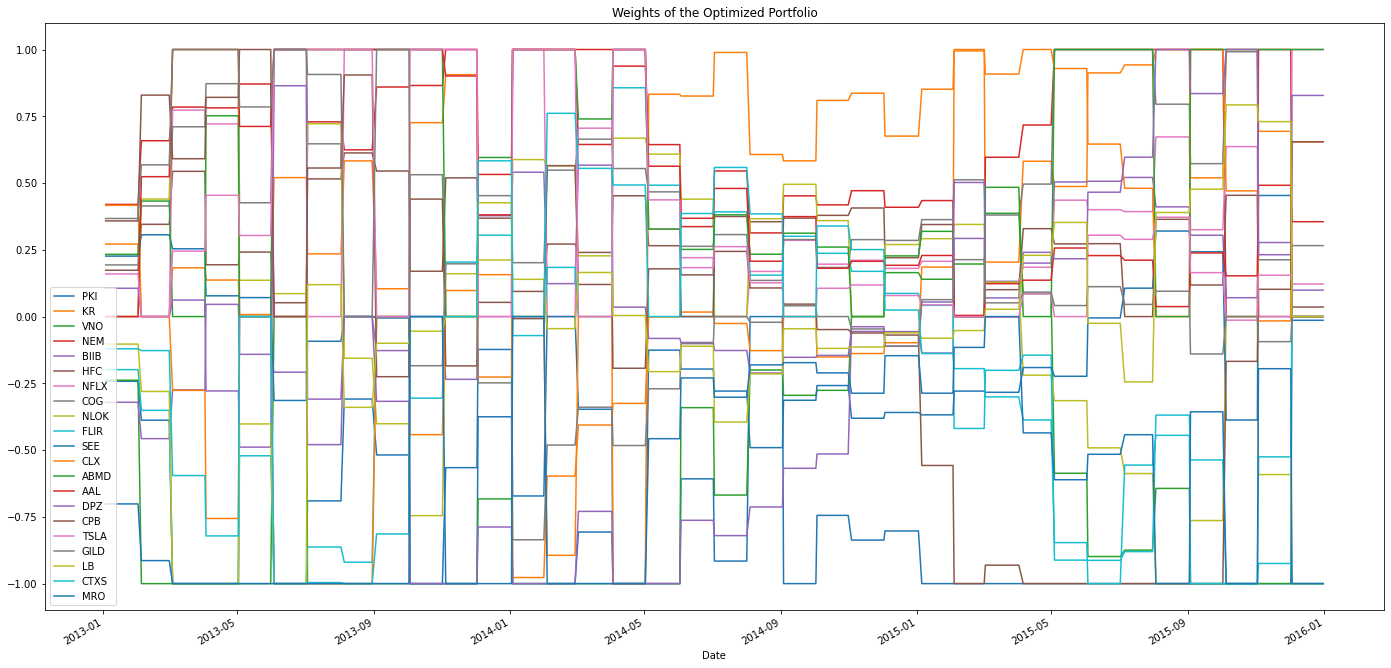

In [83]:
weights.plot(figsize=(24,12), title="Weights of the Optimized Portfolio")

In [84]:
dr_portfolio_return = tl.portfolio_return(weights, returns[weights.index[0]:])
dr_portfolio_return.columns = ["Diversification Ratio Optimized Portfolio"]

ew_portfolio_return = tl.equaly_weighted_portfolio_return(returns[start:])
ew_portfolio_return.columns = ["Equaly Weighted Portfolio"]

dr_portfolio_cumreturn = tl.cumulated_returns(dr_portfolio_return)
#cureturn2 = (1+dr_portfolio_return).cumprod()
#cureturn2.columns = ["Test cumsum"]

ew_portfolio_cumreturns = tl.cumulated_returns(ew_portfolio_return[dr_portfolio_return.index[0]:])

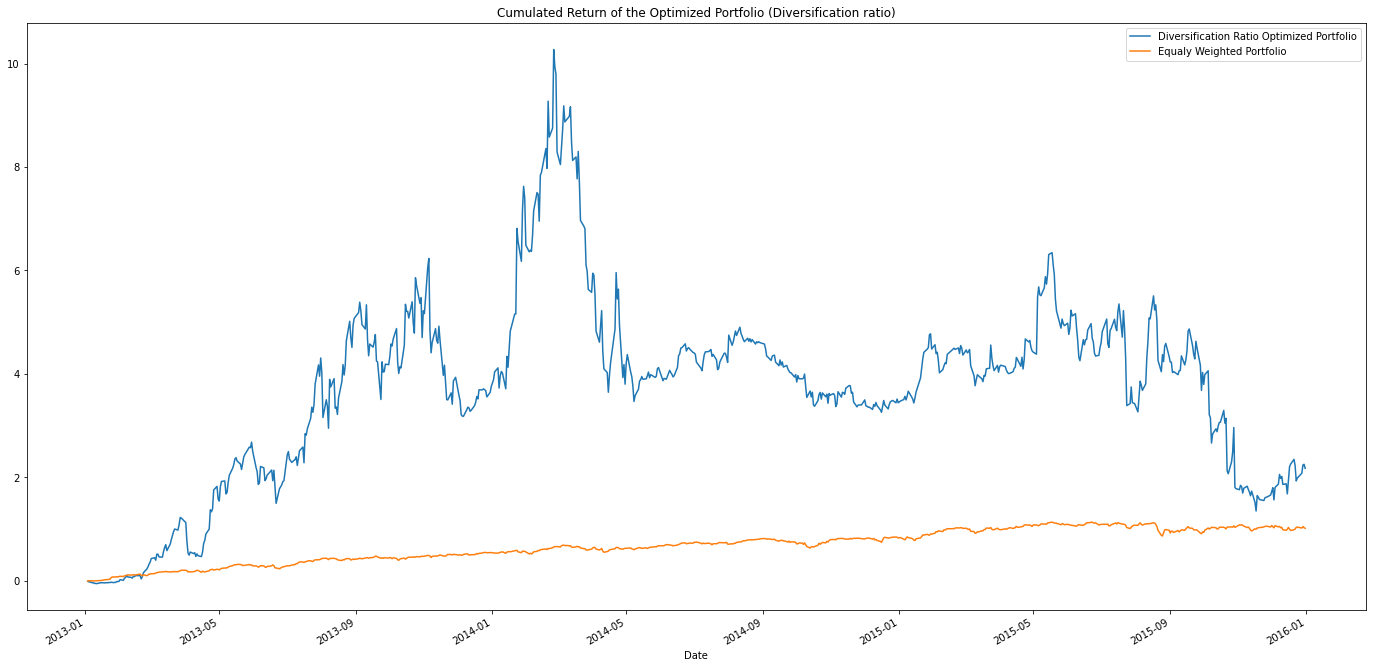

In [85]:
ax = dr_portfolio_cumreturn.plot(figsize=(24,12), title="Cumulated Return of the Optimized Portfolio (Diversification ratio)")
ew_portfolio_cumreturns.plot(ax=ax)
#cureturn2.plot(ax=ax)

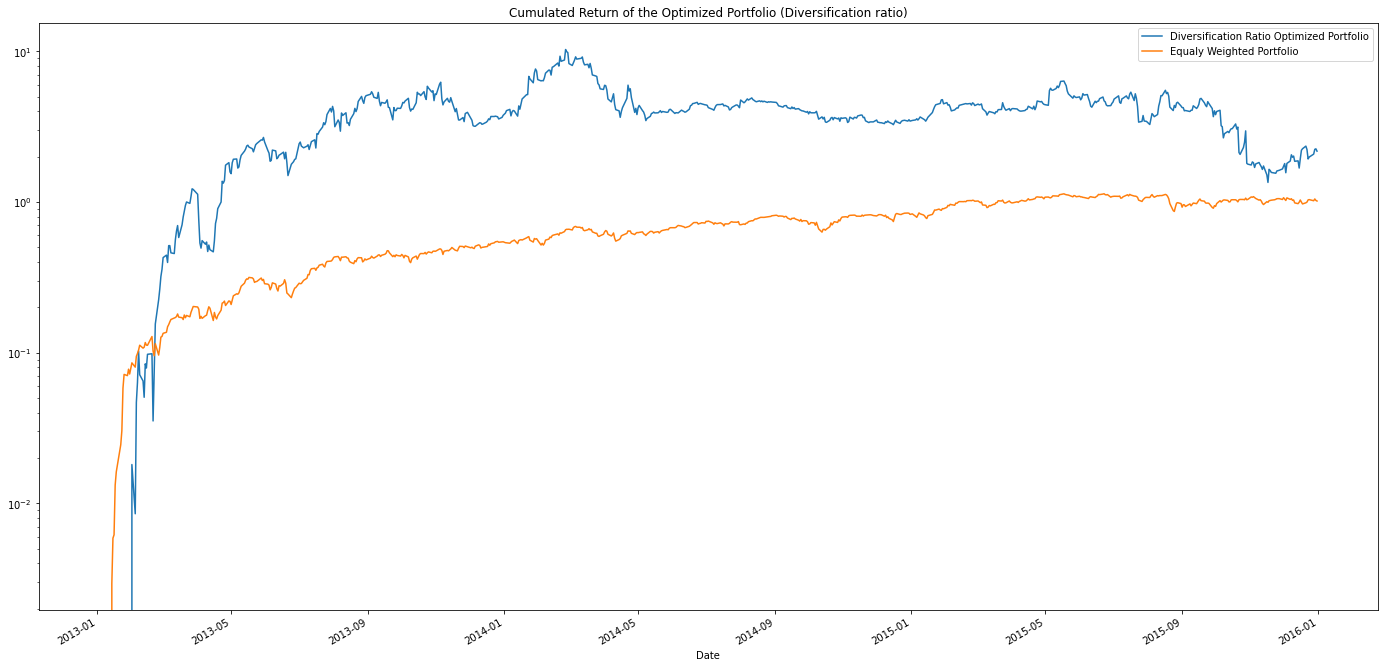

In [86]:
ax = dr_portfolio_cumreturn.plot(figsize=(24,12), title="Cumulated Return of the Optimized Portfolio (Diversification ratio)", logy = True)
ew_portfolio_cumreturns.plot(ax=ax,logy = True)

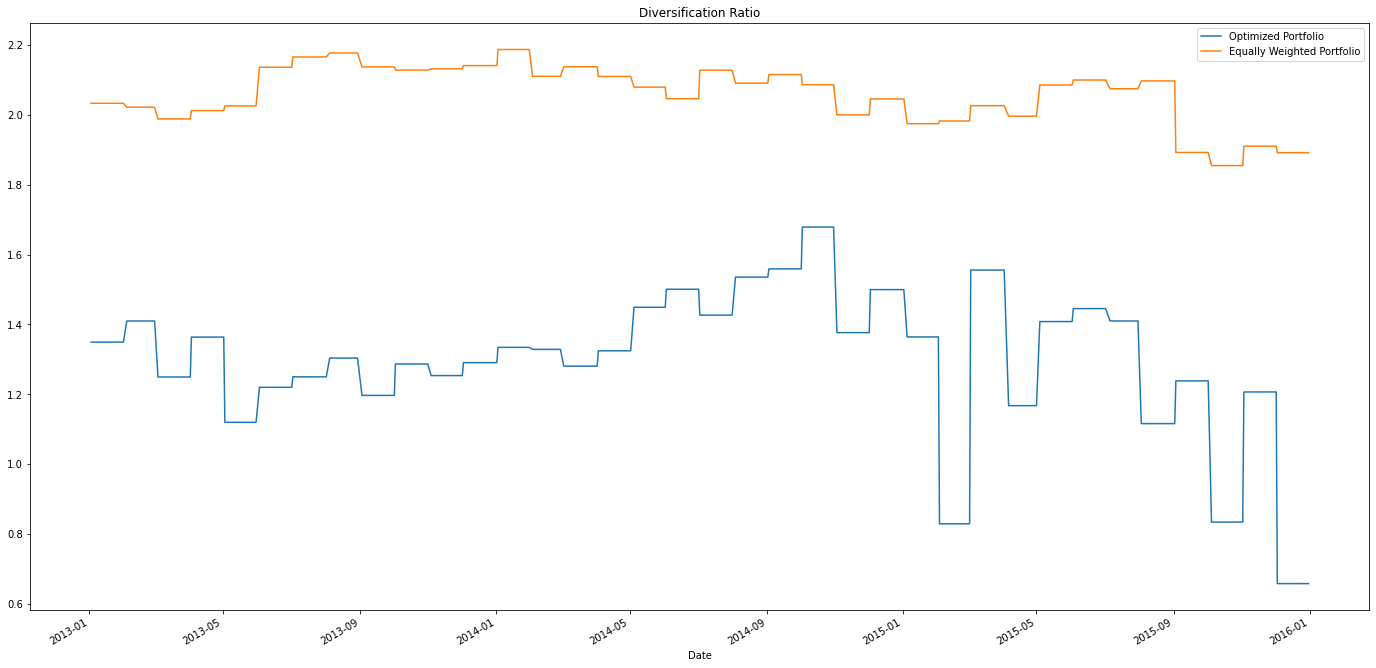

In [87]:
diversification_ratio_historic.plot(figsize=(24,12), title="Diversification Ratio")

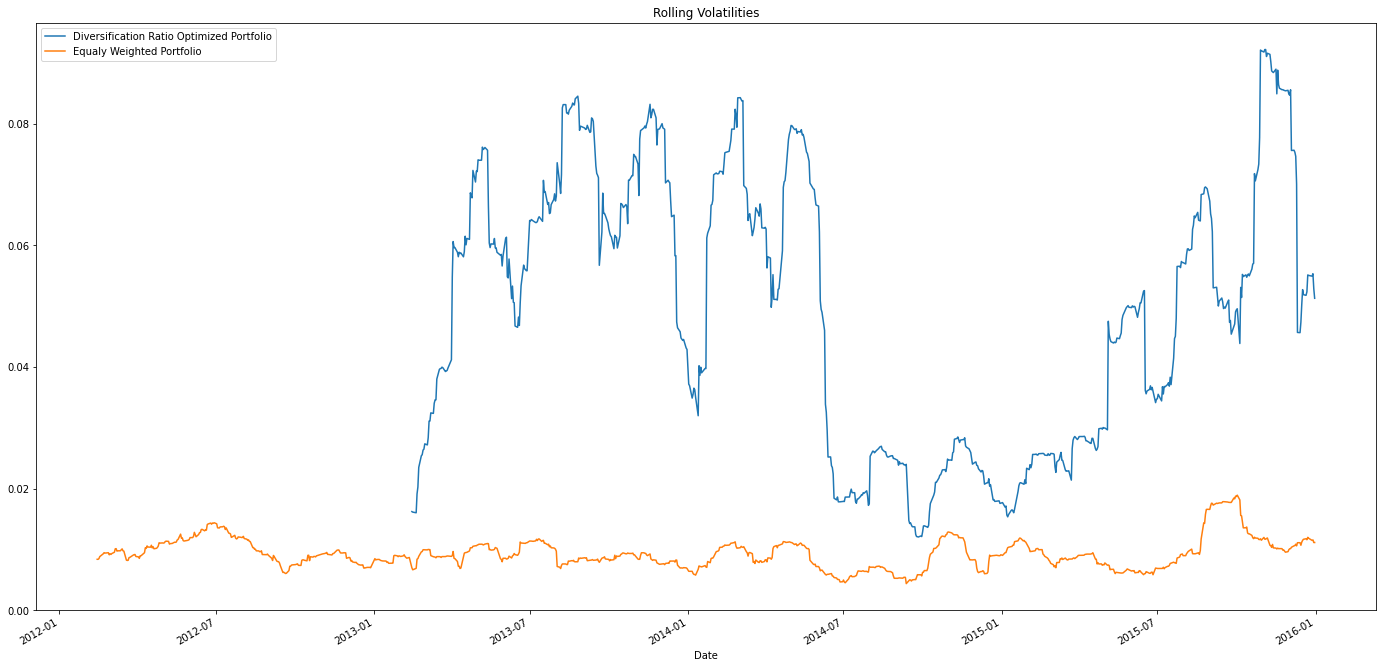

In [88]:
ax2 = dr_portfolio_return.rolling(30).std().plot(figsize=(24,12), title="Rolling Volatilities")
ew_portfolio_return.rolling(30).std().plot(ax=ax2)